# Week 3 tutorial: Multiclass classification and neural networks
# Part 1
### Introduction
In this exercise, you will implement one-vs-all logistic regression and neural networks to recognize hand-written digits. Hopefully you have watched the video lectures associated with this week. **Please keep the function declarations as they are.**

To get started with this exercise, you will need to download the Week 3 folder from the github or dropbox.
<br>

### External files included for this exercise
 - $\texttt{data/ex3data1.mat}$ - Dataset of handwritten digits (subset of MNIST)
 - $\texttt{images/}$ - Set of figures for the jupyter notebooks
 - $\texttt{utils/math_utils.py}$ - Some handy functions you've made in the past
 - $\texttt{utils/plot_utils.py}$ - Matplotlib scripts
 - $\texttt{utils/week_3_utils.py}$ - Functions specific to this week's module



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.io as sio

# 1 - Multiclass classification
For this exercise, you will use logistic regression and neural networks to recognize handwritten digits (from 0 to 9). Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. This exercise will show you how the methods you’ve learned can be used for this classification task.
In the first part of the exercise, you will extend your previous implemention of logistic regression and apply it to one-vs-all classification.

## 1.1 - Dataset
You are given a data set in $\texttt{ex3data1.mat}$ that contains 5000 training examples of handwritten digits (This is a subset of the MNIST dataset prepared by Andrew Ng). The .mat format means that that the data has been saved in a native Octave/MATLAB matrix format, instead of a text (ASCII) format like a csv-file. These matrices can be read directly into your program by using the scipy commands. The matricies loads like a dictionary (or an HDF5 file if you are familiar). 

There are 5000 training examples in $\texttt{ex3data1.mat}$, where each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. Each of these training examples becomes a single row in our data matrix X. This gives us a 5000 by 400 matrix X where every row is a training example for a handwritten digit image.
\begin{equation*}
X = \begin{bmatrix}
\cdots(x^{(1)})^T\cdots\\
\cdots(x^{(2)})^T\cdots\\
\vdots\\
\cdots(x^{(m)})^T\cdots\\
\end{bmatrix}
\end{equation*}

The second part of the training set is a 5000-dimensional vector y that contains labels for the training set. The data was adjusted from the MATLAB compatible implementation so that 0 corresponts to a label of "0", and changes the indexing to work with numpy via consecutive reshapes. 

In [3]:
matlab_data = sio.loadmat('./data/ex3data1.mat')
X = matlab_data['X']
X = X.reshape((X.shape[0],20,20),order='F')
X = X.reshape(X.shape[0],400)
y = matlab_data['y'].ravel()
y[y==10] = 0

## 1.2  - Visualizing the data
You will begin by visualizing a subset of the training set. The code below randomly selects selects 100 rows from X and passes those rows to the `display_data()` function. This function maps each row to a 20 pixel by 20 pixel grayscale image and displays the images together. We have provided the `display_data()` function, and you are encouraged to examine the code to see how it works.

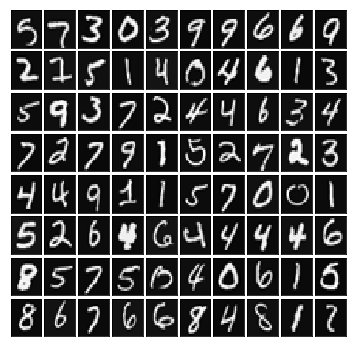

In [7]:
import sys
sys.path.append("./utils")
from plot_utils import display_data
indicies = np.random.randint(0,X.shape[0],100)
fig = display_data(X[indicies,:])

## 1.3 - One-vs-all 
Recall that we have previously vectorized the cost function for logistic regression
\begin{equation}
J(\theta) = \frac{1}{m}\sum^m_{i=1} \left[
-y^{(i)} \log(h_\theta(x^{(i)})) - (1-y^{(i)}) \log(1-h_\theta(x^{(i)}))
\right]
\end{equation}
and the gradient:
\begin{equation}
\frac{\partial J(\theta)}{\partial\theta_j} = \frac{1}{m} \sum^m_{i=1} (h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_{j} .\end{equation}
We also made use of the sklearn implementation.

In this part of the exercise, you will implement one-vs-all classification by training multiple regularized logistic regression classifiers, one for each of the K classes in our dataset. In the handwritten digits dataset, K = 10, but your code should work for any value of K.

**Exercise: Complete the code in function `one_vs_all()` to train one classifier for each class, using `sklearn.linear_model.LogisticRegression`. In particular, your code should return all the classifier parameters in a matrix $\Theta \in \mathbb{R}^{K\times(N+1)}$, where each row of $\Theta$ corresponds to the learned logistic regression parameters for one class. You can do this with a “for”-loop from 1 to K, training each classifier independently.**

When training the classifier for class $k \in \{1,...,K\}$, you will want a m-dimensional vector of labels $y$, where $y_j \in 0,1$ indicates whether the $j^{\mathrm{th}}$ training instance belongs to class $k$ ($y_j = 1$), or if it 
belongs to a different class ($y_j = 0$). 
<br>
*Hints:* 
1. You may find logical arrays helpful for this task. For instance `y_tmp = (y==10).astype(int)` will return our ground truth vector as a binary classifier of 1's and 0's for the number 10).
2. In your call to LogisticRegression(), use the 'lbfgs' solver, `max_iters=max_iters`, `fit_intercept=False`.
3. After performing the fit, the attributre `.coef_` contains the theta coefficients

In [8]:
def one_vs_all(X,y,n_labels,regularize=1,max_iter=5000):
    from sklearn.linear_model import LogisticRegression
    '''
    One-vs-all training of multiple logisitc regression classifiers, and returns all
    of the classifier weight matricies in a single matrix all_theta, where the first
    index corresponds to different classifiers, and the second axis contains a 
    classifier's weights. 
    
    Inputs
    ================
    X : (m,n) matrix of features
    y : (m,1) vector of integer classes
    n_labels : number of unique integer classes in y
    regularize : lambda value for regularization (1/C for sklearn)
    max_iter : maximum number of iterations per class 
    
    Returns
    =================
    all_theta : matrix of all classifier weights
    '''
    all_theta = np.zeros((n_labels,X.shape[1]))
    
    ### START CODE HERE ###

    ### END CODE HERE ###
    return all_theta
all_theta = one_vs_all(X,y,10)

### 1.3.1 - One-vs-all predictions
After training your one-vs-all classifier, you can now use it to predict the digit contained in a given image. For each input, you should compute the “probability” that it belongs to each class using the trained logistic regression classifiers, and return the highest probability. We are doing this first as an exercise using the weight matrix from `one_vs_all()`, then we will look at how to do this in its totality using the sklearn API. 

**Exercise: You should now complete the code in the function `predict_one_vs_all()` to use the one-vs-all classifier to make predictions. Your one-vs-all prediction function will pick the class for which the corresponding logistic regression classifier outputs the highest probability and return the class label (1, 2,..., or K) as the prediction for the input example.**


In [12]:
def predict_one_vs_all(X,all_theta):
    from math_utils import sigmoid
    '''
    creates 
    
    Inputs
    ================
    X : (m,n) matrix of features
    all_theta : (K, n) matrix of all classifier weights
    
    Returns
    =================
    y_pred : predicted y_values
    '''
    
    ### START CODE HERE ###

    ### END CODE HERE ###
    
    return y_pred
y_pred = predict_one_vs_all(X,all_theta)
acc = np.mean(y_pred==np.ravel(y))
print("Accuracy = " ,acc)

Accuracy =  0.9412


Expected accuracy ~ 0.94

### 1.3.2 - Exploiting sklearn's potential
We can actually feed sklearn the labels directly, and use the `multi_class` parameter. The below example fits with regularization, an intercept term, and then uses the native sklearn functions to predict our results, and goes a step further to use a native function to calculate our accuracy score.  

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1, solver='lbfgs', max_iter=5000,multi_class='multinomial').fit(X,y)
y_pred = clf.predict(X)
acc = np.mean(y_pred==np.ravel(y))
print("This accuracy: ",acc, "\nshould be equivalent to this accuracy: ", clf.score(X,y))

This accuracy:  0.9624 
should be equivalent to this accuracy:  0.9624
